In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
from tqdm import tqdm

In [2]:
energy = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [3]:
solar = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_power_2204.csv')

In [4]:
solar['datetime'] = pd.to_datetime(solar['datetime'])
solar.target.replace(65535.0, solar.target.mean(), inplace=True)
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day

solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()
solar_eda[['year','month','day','hour']] = solar_eda[['year','month','day','hour']].astype('str')
solar_eda['date'] = (solar_eda.year + '-' + solar_eda.month + '-' + solar_eda.day + ' ' + solar_eda.hour + ':00')
solar_eda.date = pd.to_datetime(solar_eda.date)

In [5]:
solar_eda = solar_eda.set_index('date')
solar_eda = solar_eda.fillna(0)

In [6]:
ee = solar.groupby(['hour']).mean().target

In [7]:
ee[:7] = 0

In [8]:
ee[20:] = 0

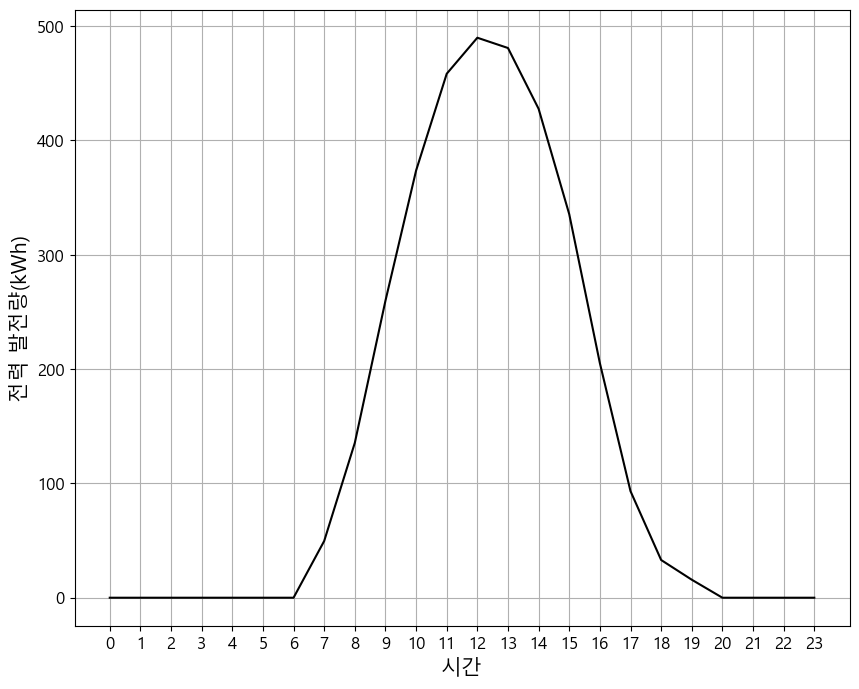

In [9]:
plt.figure(figsize=(10,8))
plt.plot(ee, color = 'k')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 발전량(kWh)', fontsize = 15)
plt.show()

In [10]:
df = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [11]:
df.date_time = pd.to_datetime(df.date_time)

In [12]:
eda_df = df.copy()

eda_df['month'] = 0
eda_df['hour'] = 0
eda_df['year'] = 0
eda_df['day'] = 0
eda_df['요일'] = 0

In [13]:
days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

In [14]:
for i in tqdm(range(len(eda_df))):
    eda_df['month'][i] = eda_df.date_time[i].month
    eda_df['hour'][i] = eda_df.date_time[i].hour
    eda_df['year'][i] = eda_df.date_time[i].year
    eda_df['day'][i] = eda_df.date_time[i].day
    eda_df['요일'][i] = days[eda_df.date_time[i].weekday()]

100%|██████████| 122400/122400 [03:21<00:00, 606.33it/s]


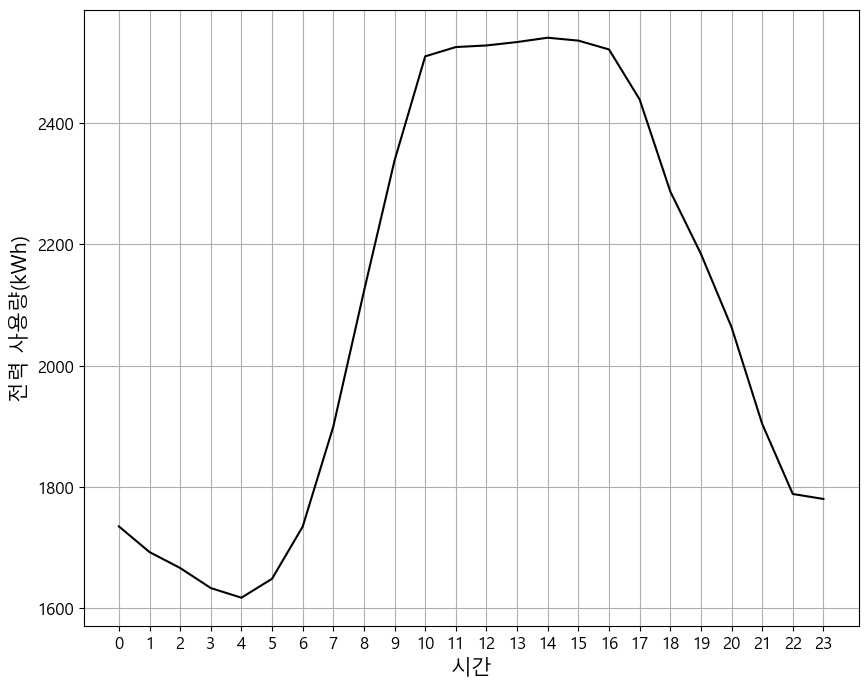

In [15]:
qq = eda_df[eda_df['태양광보유'] == 0].groupby(['hour']).mean()['전력사용량(kWh)']
plt.figure(figsize=(10,8))
plt.plot(qq, color = 'k')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 사용량(kWh)', fontsize = 15)
plt.show()

In [16]:
time = [11, 13, 14, 15, 16, 17, 18, 19]

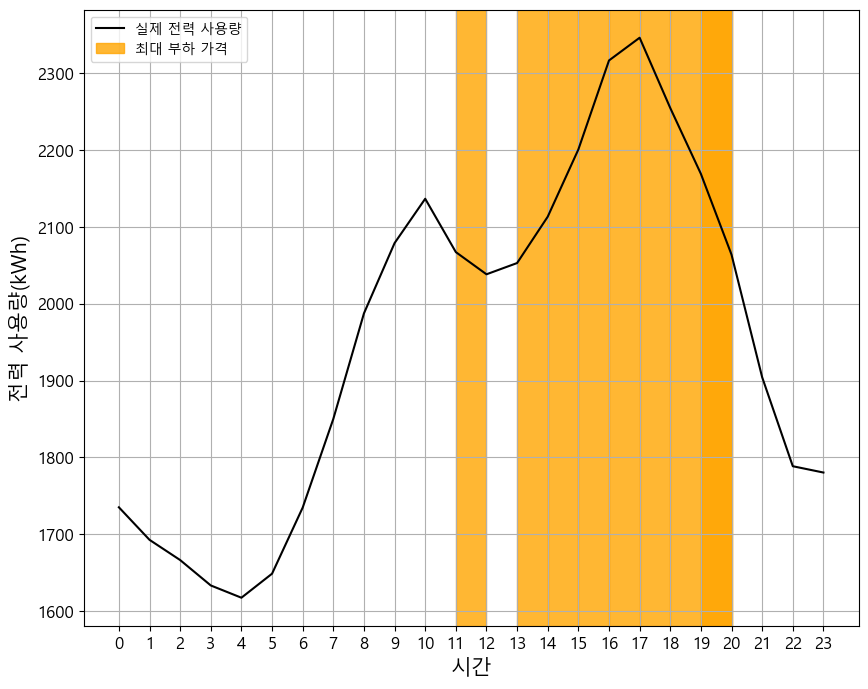

In [17]:
plt.figure(figsize=(10,8))
plt.plot(qq-ee, color = 'k', label = '실제 전력 사용량')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 사용량(kWh)', fontsize = 15)
for i in time:
    plt.axvspan(i, i+1, alpha=0.8, color='orange')
    if i == time[-1]:
        plt.axvspan(i, i+1, alpha=0.8, color='orange', label = '최대 부하 가격')
plt.legend()
plt.show()

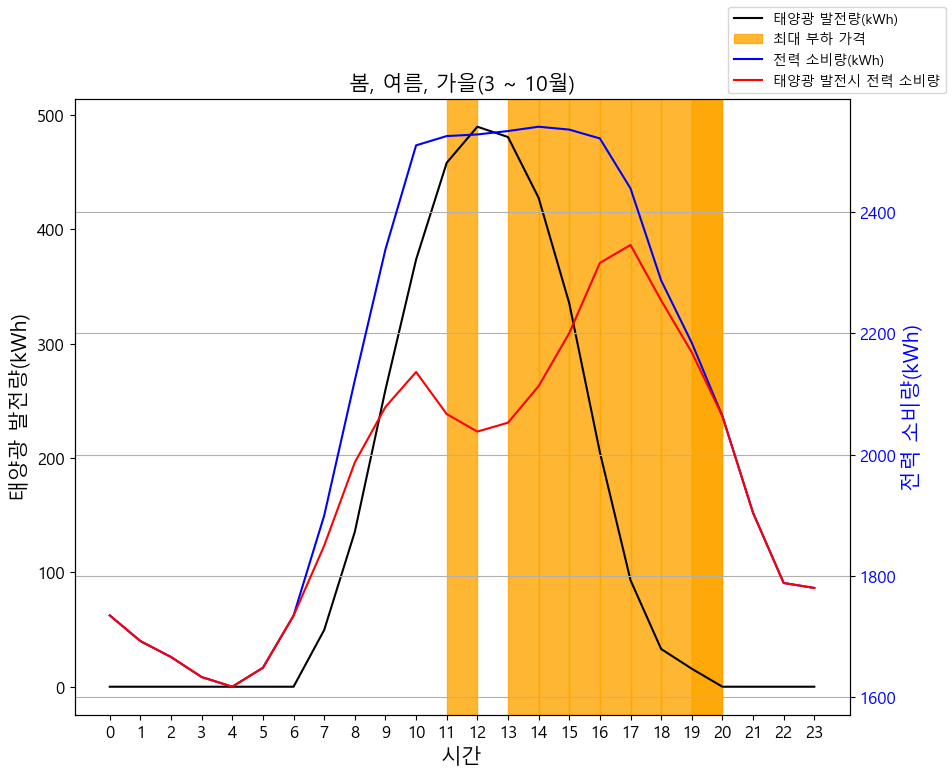

In [18]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('태양광 발전량(kWh)', color='k', fontsize=15)
ax1.plot(ee, color='k', label='태양광 발전량(kWh)')
ax1.tick_params(axis='y', labelcolor='k', labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('봄, 여름, 가을(3 ~ 10월)', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
ax2.plot(qq, color='b', label='전력 소비량(kWh)')
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

plt.plot(qq-ee, color='r', label='태양광 발전시 전력 소비량')


for i in time:
    ax1.axvspan(i, i+1, alpha=0.8, color='orange')
    if i == time[-1]:
        ax1.axvspan(i, i+1, alpha=0.8, color='orange', label = '최대 부하 가격')

plt.grid(True)
fig.legend()
plt.show()

In [19]:
time2 = [9, 10, 11, 16, 17, 18, 19]

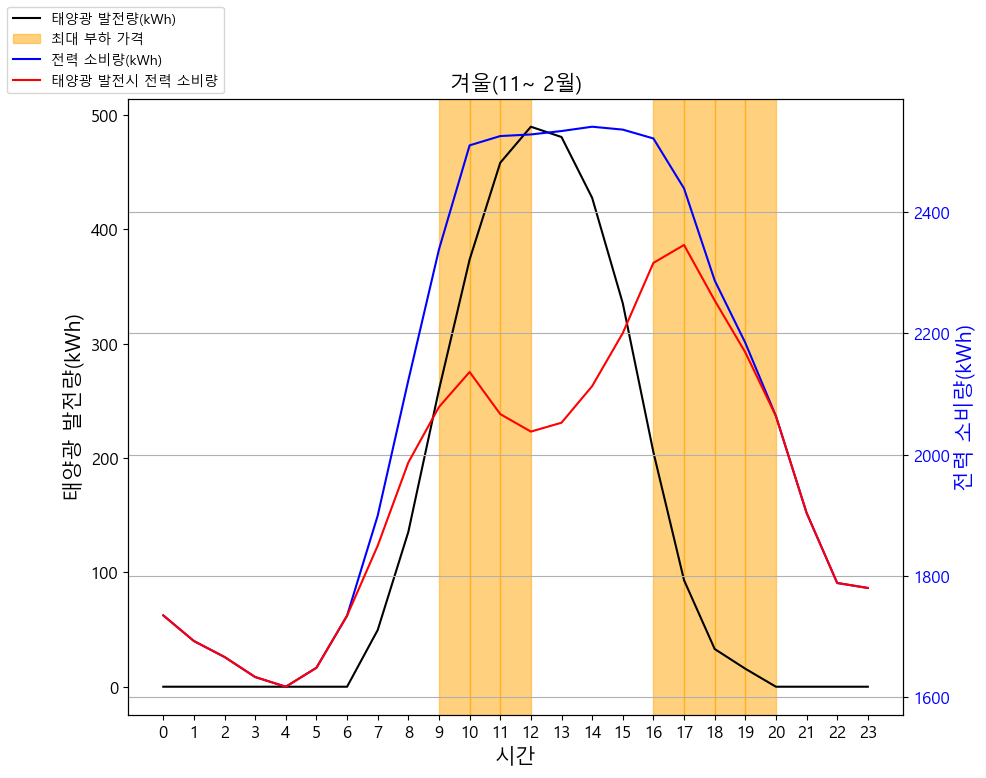

In [20]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('태양광 발전량(kWh)', color='k', fontsize=15)
ax1.plot(ee, color='k', label='태양광 발전량(kWh)')
ax1.tick_params(axis='y', labelcolor='k', labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('겨울(11~ 2월)', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
ax2.plot(qq, color='b', label='전력 소비량(kWh)')
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

plt.plot(qq-ee, color='r', label='태양광 발전시 전력 소비량')

for i in time2:
    if i == time2[-1]:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange', label='최대 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange')


fig.legend(loc='upper left')
plt.grid(True)
plt.show()


In [21]:
sell = {
    '시간' : ['경부하', '중간부하', '최대부하'],
    '여름철' : ['84.8', '137.7', '219.8'],
    '봄 가을철' : ['84.8','107.3','138.0'],
    '겨울철' : ['91.8', '137.9', '195.4']
}

In [22]:
sell = pd.DataFrame(sell)

In [23]:
sell

,시간,여름철,봄 가을철,겨울철
0,경부하,84.8,84.8,91.8
1,중간부하,137.7,107.3,137.9
2,최대부하,219.8,138.0,195.4


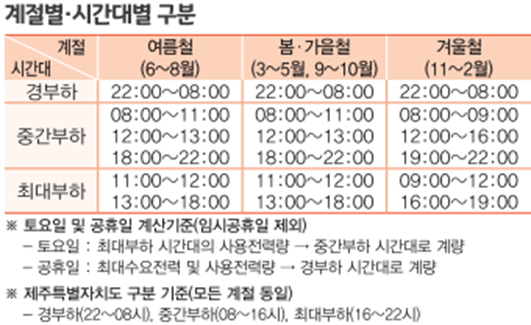

In [24]:
summer_price = [84.8, 84.8, 84.8, 84.8, 84.8,
                84.8, 84.8, 84.8, 137.7, 137.7,
                137.7, 219.8, 137.7, 219.8, 219.8,
                219.8, 219.8, 219.8, 219.8, 137.7,
                137.7, 137.7, 84.8, 84.8]

In [25]:
normal_price = [84.8, 84.8, 84.8, 84.8, 84.8,
                84.8, 84.8, 84.8, 107.3, 107.3,
                107.3, 138, 107.3, 138, 138,
                138, 138, 138, 138, 107.3,
                107.3, 107.3, 84.8, 84.8]

In [26]:
winter_price = [91.8, 91.8, 91.8, 91.8, 91.8, 
                91.8, 91.8, 91.8, 137.9, 195.4,
                195.4, 195.4, 137.9, 137.9, 137.9,
                137.9, 195.4, 195.4, 195.4, 195.4,
                137.9, 137.9, 91.8, 91.8]

In [27]:
np.dot(winter_price, (qq-ee))

6557492.499794514

In [28]:
np.dot(winter_price, qq)

7101001.773278682

In [29]:
np.dot(winter_price, qq) - np.dot(winter_price, (qq - ee))

543509.2734841676

---
# 최적화 - 겨울

In [30]:
import pulp

In [31]:
# 시간당 전력 생산량
production = ee

# 시간당 전력 사용량
consumption = qq
# 시간당 전력 가격
price = winter_price
# 모델 생성
model = pulp.LpProblem("Power Cost Minimization", pulp.LpMinimize)

# 변수 생성
use = [pulp.LpVariable("use{}".format(i), 0) for i in range(24)]
generated_use = [pulp.LpVariable("gen_use{}".format(i), 0) for i in range(24)]

# 목적함수 생성
total_cost = pulp.lpSum([(consumption[i] - generated_use[i]) * price[i] for i in range(24)])
model += total_cost

# 제약조건 생성
for i in range(24):
    model += generated_use[i] <= production[i]
    if i > 0:
        model += generated_use[i] <= pulp.lpSum([generated_use[j] for j in range(i)])
    model += generated_use[i] <= use[i]
    model += generated_use[i] >= pulp.lpSum([generated_use[j] for j in range(i)])
    model += use[i] >= generated_use[i]
    model += use[i] <= consumption[i]
    
model += pulp.lpSum(generated_use) == pulp.lpSum(consumption)
    
# 문제 풀이
model.solve()

# 결과 출력
for i in range(24):
    print("시간 {}: 생산량 = {:.2f}, 소비량 = {:.2f}, 사용량 = {:.2f}, 발전된 전력 사용량 = {:.2f}".format(i, production[i], consumption[i], use[i].value(), generated_use[i].value()))

print("전체 요금: {:.2f}".format(pulp.value(model.objective)))


시간 0: 생산량 = 0.00, 소비량 = 1735.23, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 1: 생산량 = 0.00, 소비량 = 1692.90, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 2: 생산량 = 0.00, 소비량 = 1666.61, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 3: 생산량 = 0.00, 소비량 = 1633.57, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 4: 생산량 = 0.00, 소비량 = 1617.61, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 5: 생산량 = 0.00, 소비량 = 1648.87, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 6: 생산량 = 0.00, 소비량 = 1734.80, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 7: 생산량 = 49.61, 소비량 = 1899.73, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 8: 생산량 = 135.46, 소비량 = 2122.85, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 9: 생산량 = 259.79, 소비량 = 2338.62, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 10: 생산량 = 373.65, 소비량 = 2510.15, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 11: 생산량 = 458.35, 소비량 = 2525.47, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 12: 생산량 = 489.87, 소비량 = 2528.12, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 13: 생산량 = 480.87, 소비량 = 2533.75, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 14: 생산량 = 427.69, 소비량 = 2540.87, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 15: 생산량 = 335.48, 소비량 = 2536.09,

In [32]:
import pyswarms as ps

In [33]:
power_generation = ee # 시간당 태양광 발전량 리스트
power_usage = qq # 시간당 공장에서 전력을 사용하는 양 리스트
power_price = winter_price # 시간당 전력 가격 리스트

def minimize_cost(x):
    n_particles = x.shape[0]
    costs = np.zeros(n_particles)

    for i in range(n_particles):
        total_cost = 0
        accumulated_gen = 0

        for hour in range(24):
            gen_hour = power_generation[hour]
            usage_hour = power_usage[hour]
            price_hour = power_price[hour]

            accumulated_gen += gen_hour
            gen_used = min(accumulated_gen, usage_hour, x[i, hour])
            accumulated_gen -= gen_used

            total_cost += (usage_hour - gen_used) * price_hour

        costs[i] = total_cost

    return costs


# PSO 알고리즘 설정
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
bounds = (np.zeros(24), np.array(power_usage))
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=24, options=options, bounds=bounds)

# 최적화 실행
cost, pos = optimizer.optimize(minimize_cost, iters=1000)




2023-05-08 14:40:28,917 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=6.52e+6
2023-05-08 14:40:41,277 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 6515208.151255893, best pos: [ 453.52846333 1331.49580643  594.58362184 1462.5022093   765.47066081
  687.61364299  360.02983359  274.14995995 1236.52866021 1613.24855239
 1718.77185171 1245.48784113  620.22027264 1727.31518493    3.46679533
   24.31738839 1386.67692216 1229.2106021  1543.85559774 1018.93634688
  871.43243747 1654.91443866 1140.89921419  866.68469657]


In [50]:
# 변수와 데이터 정의
power_generation = ee # 시간당 태양광 발전량 리스트
power_usage = qq # 시간당 공장에서 전력을 사용하는 양 리스트
power_price = winter_price # 시간당 전력 가격 리스트

# 목적 함수 정의
def minimize_cost(x):
    n_particles = x.shape[0]
    costs = np.zeros(n_particles)

    for i in range(n_particles):
        total_cost = 0
        accumulated_gen = 0

        for hour in range(24):
            gen_hour = power_generation[hour]
            usage_hour = power_usage[hour]
            price_hour = power_price[hour]

            accumulated_gen += gen_hour
            gen_used = min(accumulated_gen, usage_hour, x[i, hour])
            accumulated_gen -= gen_used

            total_cost += (usage_hour - gen_used) * price_hour

        costs[i] = total_cost

    return costs

# PSO 알고리즘 설정
options = {'c1': 0.5, 'c2': 0.5, 'w': 1.5}
bounds = (np.zeros(24), np.array(power_usage))
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=24, options=options, bounds=bounds)

# 최적화 실행
cost, pos = optimizer.optimize(minimize_cost, iters=1000)

print(f"Minimum cost: {cost}")
print(f"Power usage schedule: {pos}")

# 시간당 발전된 전력 사용량 계산 및 출력
accumulated_gen = 0
hourly_gen_used = np.zeros(24)
for hour in range(24):
    gen_hour = power_generation[hour]
    usage_hour = power_usage[hour]
    accumulated_gen += gen_hour
    gen_used = min(accumulated_gen, usage_hour, pos[hour])
    accumulated_gen -= gen_used
    hourly_gen_used[hour] = gen_used

2023-05-08 14:45:47,908 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.5, 'w': 1.5}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=6.48e+6
2023-05-08 14:46:01,584 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 6476855.972938184, best pos: [ 155.7667726   930.12113185  565.12431553 1544.45010725  233.23575337
  652.57256423  176.92060079  177.82790666  460.4512649  1151.20959627
  895.69050583  105.0002221   144.84373307    2.56308576   37.12403426
  147.0043571  1506.16196283 1579.62455471 1067.97025753  878.7874237
 1527.28109785 1788.50287176  390.19002756 1734.01213616]


Minimum cost: 6476855.972938184
Power usage schedule: [ 155.7667726   930.12113185  565.12431553 1544.45010725  233.23575337
  652.57256423  176.92060079  177.82790666  460.4512649  1151.20959627
  895.69050583  105.0002221   144.84373307    2.56308576   37.12403426
  147.0043571  1506.16196283 1579.62455471 1067.97025753  878.7874237
 1527.28109785 1788.50287176  390.19002756 1734.01213616]


In [51]:
print(f"Minimum cost: {cost}")

print(f"Hourly generated power usage: {hourly_gen_used}")

print(f"Power usage schedule: {pos}")

Minimum cost: 6476855.972938184
Hourly generated power usage: [   0.            0.            0.            0.            0.
    0.            0.           49.61234506  135.46151591  259.78633563
  373.64848887  105.0002221   144.84373307    2.56308576   37.12403426
  147.0043571  1506.16196283  547.95893711   33.00736901   15.74957358
    0.            0.            0.            0.        ]
Power usage schedule: [ 155.7667726   930.12113185  565.12431553 1544.45010725  233.23575337
  652.57256423  176.92060079  177.82790666  460.4512649  1151.20959627
  895.69050583  105.0002221   144.84373307    2.56308576   37.12403426
  147.0043571  1506.16196283 1579.62455471 1067.97025753  878.7874237
 1527.28109785 1788.50287176  390.19002756 1734.01213616]


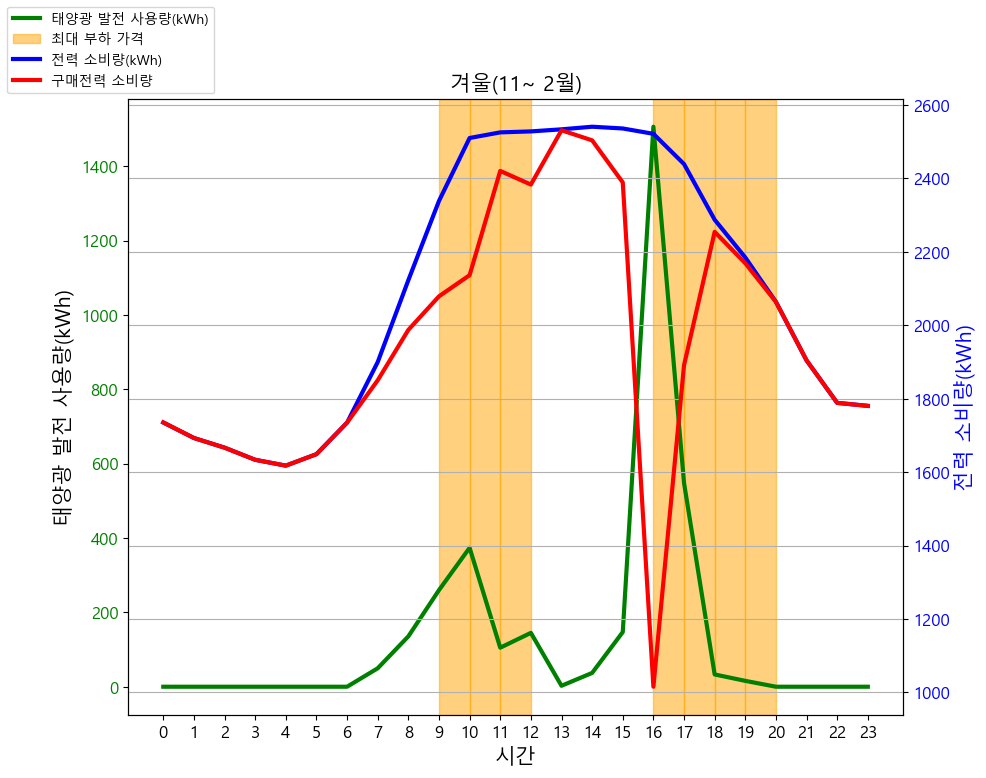

In [56]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('태양광 발전 사용량(kWh)', color='k', fontsize=15)
ax1.plot(hourly_gen_used, color='green', label='태양광 발전 사용량(kWh)', linewidth = 3)
ax1.tick_params(axis='y', labelcolor='green', labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('겨울(11~ 2월)', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
ax2.plot(qq, color='b', label='전력 소비량(kWh)', linewidth = 3)
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

plt.plot(qq-hourly_gen_used, color='r', label='구매전력 소비량', linewidth = 3)

for i in time2:
    if i == time2[-1]:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange', label='최대 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange')
    

fig.legend(loc='upper left')
plt.grid(True)
plt.show()


In [37]:
import random
from deap import base, creator, tools, algorithms

In [38]:
# 변수와 데이터 정의
power_generation = ee # 시간당 태양광 발전량 리스트
power_usage = qq # 시간당 공장에서 전력을 사용하는 양 리스트
power_price = winter_price # 시간당 전력 가격 리스트

# 목적 함수 정의
def minimize_cost(individual):
    total_cost = 0
    accumulated_gen = 0

    for hour in range(24):
        gen_hour = power_generation[hour]
        usage_hour = power_usage[hour]
        price_hour = power_price[hour]

        accumulated_gen += gen_hour
        gen_used = min(accumulated_gen, usage_hour, individual[hour])
        accumulated_gen -= gen_used

        total_cost += (usage_hour - gen_used) * price_hour

    return total_cost,

# 유전 알고리즘 설정
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.random)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=24)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", minimize_cost)

# 최적화 실행
pop = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("Avg", np.mean)
stats.register("Std", np.std)
stats.register("Min", np.min)
stats.register("Max", np.max)

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=3000, stats=stats, halloffame=hof, verbose=True)

best_individual = hof[0]
best_cost = minimize_cost(best_individual)


gen	nevals	Avg        	Std    	Min        	Max        
0  	50    	7.09972e+06	170.886	7.09937e+06	7.10012e+06
1  	30    	7.09957e+06	143.006	7.09913e+06	7.0999e+06 
2  	30    	7.09947e+06	151.221	7.09879e+06	7.09984e+06
3  	33    	7.09938e+06	156.099	7.09886e+06	7.09972e+06
4  	32    	7.09928e+06	209.32 	7.09864e+06	7.09963e+06
5  	24    	7.09912e+06	233.455	7.09859e+06	7.09957e+06
6  	27    	7.09895e+06	228.769	7.09831e+06	7.09941e+06
7  	29    	7.09877e+06	380.853	7.09769e+06	7.09982e+06
8  	34    	7.09851e+06	381.697	7.09757e+06	7.09934e+06
9  	21    	7.09822e+06	418.94 	7.09734e+06	7.09935e+06
10 	28    	7.09796e+06	366.332	7.09734e+06	7.09867e+06
11 	28    	7.09761e+06	235.338	7.09728e+06	7.0982e+06 
12 	22    	7.09744e+06	150.951	7.09701e+06	7.09807e+06
13 	28    	7.09733e+06	130.815	7.09698e+06	7.09764e+06
14 	32    	7.09723e+06	175.218	7.0967e+06 	7.09773e+06
15 	32    	7.09711e+06	200.88 	7.09637e+06	7.09757e+06
16 	37    	7.09694e+06	256.609	7.09637e+06	7.0979e+06 
17 	29    

In [39]:
print(f"Minimum cost: {best_cost[0]}")
print(f"Power usage schedule: {best_individual}")

Minimum cost: 6542108.526137963
Power usage schedule: [-14.83126376535064, -2.733143945966037, 10.271730843033009, 2.1147304396539117, 8.891135787024854, 0.530359728823042, -5.049348506813449, 37.298872036450234, 151.7612530285032, 258.41125460278295, 292.14983583718373, 280.71444444807366, 163.459670881629, 189.82665839209102, 168.52844148663513, 190.03151474414292, 235.62279390860826, 272.815672165226, 272.34263248575513, 250.2447185448922, 173.32819159588246, 214.72568245681424, 141.09665126788641, 121.5599922968701]


In [42]:
from scipy.optimize import linprog

In [43]:
power_generation = ee # 시간당 태양광 발전량 리스트
power_usage = qq # 시간당 공장에서 전력을 사용하는 양 리스트
power_price = winter_price # 시간당 전력 가격 리스트

# 목적 함수 계수 정의
c = np.hstack((power_price, np.zeros(24)))

# 제약 조건 정의
A_eq = []
b_eq = []

# 발전된 전력 사용량은 현재 시간까지 발전된 양만 사용할 수 있음
for i in range(24):
    A_eq.append([0] * i + [1] * (24 - i) + [-1 if j == i else 0 for j in range(24)])
    b_eq.append(power_generation[i])

# 하루에 발전된 전력은 모두 사용해야 함
A_eq.append([0]*24 + [-1]*24)
b_eq.append(-sum(power_generation))

# 전력 사용량과 전력 발전량, 전력 가격은 고정이지만, 발전된 전력 사용량은 어느 시간에 사용할지는 정할 수 있음
bounds = [(0, usage) for usage in power_usage] + [(0, None) for _ in range(24)]

# 선형 계획법 실행
res = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# 결과 출력
if res.success:
    minimum_cost = res.fun
    power_usage_schedule = res.x[:24]

    print(f"Minimum cost: {minimum_cost}")
    print(f"Power usage schedule: {power_usage_schedule}")
else:
    print("Optimization failed. Please check the constraints and data.")


Optimization failed. Please check the constraints and data.


---
# 최적화 - 봄, 가을

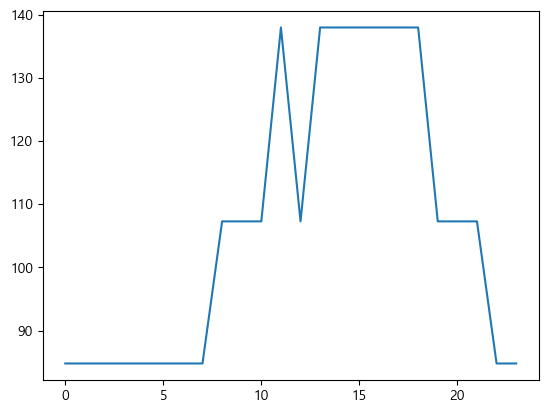

In [44]:
plt.plot(normal_price)

In [45]:
np.dot(normal_price, qq-ee)

5115353.840455908

In [46]:
# 변수와 데이터 정의
power_generation = ee # 시간당 태양광 발전량 리스트
power_usage = qq # 시간당 공장에서 전력을 사용하는 양 리스트
power_price = normal_price # 시간당 전력 가격 리스트

# 목적 함수 정의
def minimize_cost(x):
    n_particles = x.shape[0]
    costs = np.zeros(n_particles)

    for i in range(n_particles):
        total_cost = 0
        accumulated_gen = 0

        for hour in range(24):
            gen_hour = power_generation[hour]
            usage_hour = power_usage[hour]
            price_hour = power_price[hour]

            accumulated_gen += gen_hour
            gen_used = min(accumulated_gen, usage_hour, x[i, hour])
            accumulated_gen -= gen_used

            total_cost += (usage_hour - gen_used) * price_hour

        costs[i] = total_cost

    return costs

# PSO 알고리즘 설정
options = {'c1': 0.5, 'c2': 0.5, 'w': 1.5}
bounds = (np.zeros(24), np.array(power_usage))
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=24, options=options, bounds=bounds)

# 최적화 실행
cost, pos = optimizer.optimize(minimize_cost, iters=1000)

print(f"Minimum cost: {cost}")
print(f"Power usage schedule: {pos}")

# 시간당 발전된 전력 사용량 계산 및 출력
accumulated_gen = 0
hourly_gen_used = np.zeros(24)
for hour in range(24):
    gen_hour = power_generation[hour]
    usage_hour = power_usage[hour]
    accumulated_gen += gen_hour
    gen_used = min(accumulated_gen, usage_hour, pos[hour])
    accumulated_gen -= gen_used
    hourly_gen_used[hour] = gen_used

2023-05-08 14:44:05,869 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.5, 'w': 1.5}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=5.08e+6
2023-05-08 14:44:19,771 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5083859.794043705, best pos: [1634.8708448   532.78457429 1561.66237209   23.08725627 1333.30533032
  650.88465665  247.40993677 1844.21441732  957.36378287   13.20800676
   69.92233914 1964.4505633    14.31255332 1917.1373051  2480.50356846
 2165.75781581 1051.23061868 1303.0973597   927.88853008 1673.21518643
 1849.32892535 1296.65131106 1481.00914341 1452.23817356]


Minimum cost: 5083859.794043705
Power usage schedule: [1634.8708448   532.78457429 1561.66237209   23.08725627 1333.30533032
  650.88465665  247.40993677 1844.21441732  957.36378287   13.20800676
   69.92233914 1964.4505633    14.31255332 1917.1373051  2480.50356846
 2165.75781581 1051.23061868 1303.0973597   927.88853008 1673.21518643
 1849.32892535 1296.65131106 1481.00914341 1452.23817356]


In [47]:
print(f"Minimum cost: {cost}")

print(f"Hourly generated power usage: {hourly_gen_used}")

print(f"Power usage schedule: {pos}")

Minimum cost: 5083859.794043705
Hourly generated power usage: [   0.            0.            0.            0.            0.
    0.            0.           49.61234506  135.46151591   13.20800676
   69.92233914 1008.65316311   14.31255332  956.43287867  427.68631271
  335.4778456   205.18187848   93.21617893   33.00736901   15.74957358
    0.            0.            0.            0.        ]
Power usage schedule: [1634.8708448   532.78457429 1561.66237209   23.08725627 1333.30533032
  650.88465665  247.40993677 1844.21441732  957.36378287   13.20800676
   69.92233914 1964.4505633    14.31255332 1917.1373051  2480.50356846
 2165.75781581 1051.23061868 1303.0973597   927.88853008 1673.21518643
 1849.32892535 1296.65131106 1481.00914341 1452.23817356]


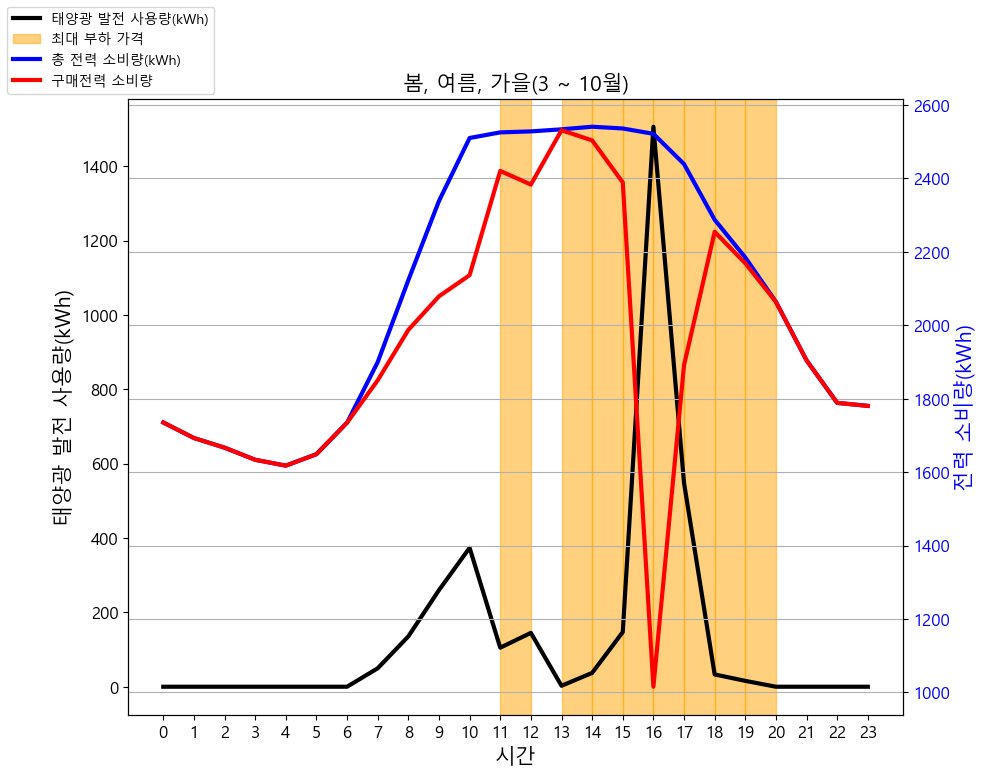

In [57]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('태양광 발전 사용량(kWh)', color='k', fontsize=15)
ax1.plot(hourly_gen_used, color='k', label='태양광 발전 사용량(kWh)', linewidth = 3)
ax1.tick_params(axis='y', labelcolor='k', labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('봄, 여름, 가을(3 ~ 10월)', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
ax2.plot(qq, color='b', label='총 전력 소비량(kWh)', linewidth = 3)
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

plt.plot(qq-hourly_gen_used, color='r', label='구매전력 소비량', linewidth = 3)

for i in time:
    if i == time[-1]:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange', label='최대 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange')
    

fig.legend(loc='upper left')
plt.grid(True)
plt.show()
